 # Business Problem:

On the basis of given parameters our aim is to predict whether patient have liver disease or not

In [ ]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Liver.csv')

In [ ]:
data.head()

65 Female   0.7  0.1  187  16   18  6.8  3.3   0.9  1
0  62   Male  10.9  5.5  699  64  100  7.5  3.2  0.74  1
1  62   Male   7.3  4.1  490  60   68  7.0  3.3  0.89  1
2  58   Male   1.0  0.4  182  14   20  6.8  3.4  1.00  1
3  72   Male   3.9  2.0  195  27   59  7.3  2.4  0.40  1
4  46   Male   1.8  0.7  208  19   14  7.6  4.4  1.30  1

In [ ]:
data.rename(columns={'65':'Age','Female':'Gender','0.7':'Total_Bilirubin','0.1':'Direct_Bilirubin','187':'Alkline_Phospate','16':'Alamine_Aminotra','18':'Aspartate_Aminotra','6.8':'Total_Protiens','3.3':'Albumin','0.9':'A/G_ratio','1':'target'},inplace=True)

In [ ]:
data.head()

Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkline_Phospate  \
0   62   Male             10.9               5.5               699   
1   62   Male              7.3               4.1               490   
2   58   Male              1.0               0.4               182   
3   72   Male              3.9               2.0               195   
4   46   Male              1.8               0.7               208   

   Alamine_Aminotra  Aspartate_Aminotra  Total_Protiens  Albumin  A/G_ratio  \
0                64                 100             7.5      3.2       0.74   
1                60                  68             7.0      3.3       0.89   
2                14                  20             6.8      3.4       1.00   
3                27                  59             7.3      2.4       0.40   
4                19                  14             7.6      4.4       1.30   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
data.shape

(582, 11)

In [ ]:
data.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkline_Phospate  \
count  582.000000       582.000000        582.000000        582.000000   
mean    44.711340         3.303265          1.488488        290.754296   
std     16.181921         6.213926          2.810324        243.108929   
min      4.000000         0.400000          0.100000         63.000000   
25%     33.000000         0.800000          0.200000        175.250000   
50%     45.000000         1.000000          0.300000        208.000000   
75%     57.750000         2.600000          1.300000        298.000000   
max     90.000000        75.000000         19.700000       2110.000000   

       Alamine_Aminotra  Aspartate_Aminotra  Total_Protiens     Albumin  \
count        582.000000          582.000000      582.000000  582.000000   
mean          80.824742          110.068729        6.482646    3.141581   
std          182.757696          289.141876        1.086306    0.796176   
min           10.000000           10.000000        2.700000    0.900000   
25%           23.000000           25.000000        5.800000    2.600000   
50%           35.000000           42.000000        6.600000    3.100000   
75%           60.750000           87.000000        7.200000    3.800000   
max         2000.000000         4929.000000        9.600000    5.500000   

        A/G_ratio      target  
count  578.000000  582.000000  
mean     0.947145    1.286942  
std      0.319863    0.452723  
min      0.300000    1.000000  
25%      0.700000    1.000000  
50%      0.940000    1.000000  
75%      1.100000    2.000000  
max      2.800000    2.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 582 non-null    int64  
 1   Gender              582 non-null    object 
 2   Total_Bilirubin     582 non-null    float64
 3   Direct_Bilirubin    582 non-null    float64
 4   Alkline_Phospate    582 non-null    int64  
 5   Alamine_Aminotra    582 non-null    int64  
 6   Aspartate_Aminotra  582 non-null    int64  
 7   Total_Protiens      582 non-null    float64
 8   Albumin             582 non-null    float64
 9   A/G_ratio           578 non-null    float64
 10  target              582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [ ]:
data.isnull().sum()

Age                   0
Gender                0
Total_Bilirubin       0
Direct_Bilirubin      0
Alkline_Phospate      0
Alamine_Aminotra      0
Aspartate_Aminotra    0
Total_Protiens        0
Albumin               0
A/G_ratio             4
target                0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Age                   0
Gender                0
Total_Bilirubin       0
Direct_Bilirubin      0
Alkline_Phospate      0
Alamine_Aminotra      0
Aspartate_Aminotra    0
Total_Protiens        0
Albumin               0
A/G_ratio             0
target                0
dtype: int64

In [ ]:
data.target.value_counts()

1    413
2    165
Name: target, dtype: int64

In [ ]:
data['Gender']=data['Gender'].replace({'Male':0,'Female':1})

In [ ]:
data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkline_Phospate  \
0   62       0             10.9               5.5               699   
1   62       0              7.3               4.1               490   
2   58       0              1.0               0.4               182   
3   72       0              3.9               2.0               195   
4   46       0              1.8               0.7               208   

   Alamine_Aminotra  Aspartate_Aminotra  Total_Protiens  Albumin  A/G_ratio  \
0                64                 100             7.5      3.2       0.74   
1                60                  68             7.0      3.3       0.89   
2                14                  20             6.8      3.4       1.00   
3                27                  59             7.3      2.4       0.40   
4                19                  14             7.6      4.4       1.30   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

# Exploratory Data Analysis

# Univariate Analysis

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

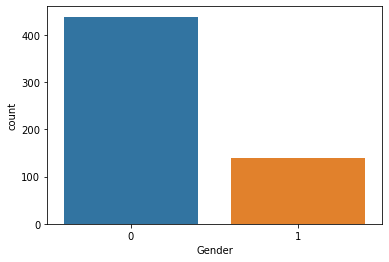

In [ ]:
sns.countplot("Gender",data=data)

From the above plot we conclude that most of the male patients have liver disease.

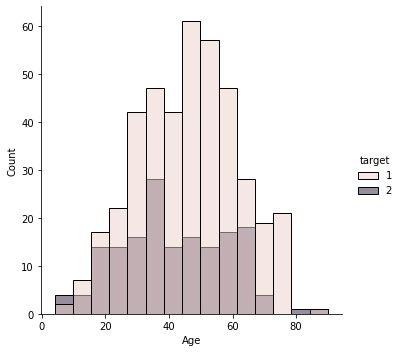

In [ ]:
sns.displot(data=data,x='Age',hue='target')

<AxesSubplot:xlabel='Alkline_Phospate'>

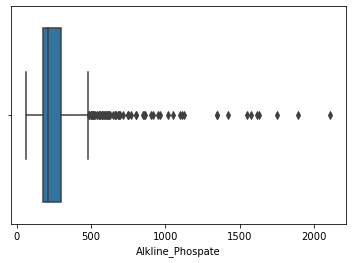

In [ ]:
sns.boxplot(x=data.Alkline_Phospate)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alkline_Phospate', ylabel='Density'>

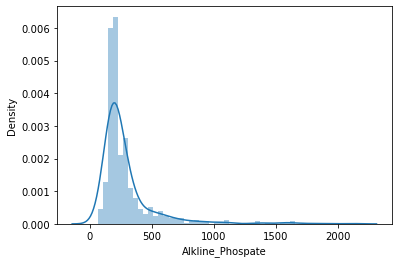

In [ ]:
# checking ouliers
sns.distplot(data.Alkline_Phospate)

In [ ]:
# Interquartile range (IQR)

from scipy import stats

IQR = stats.iqr(data.Alkline_Phospate, interpolation = 'midpoint') 

IQR

122.5

In [ ]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.Alkline_Phospate.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.Alkline_Phospate.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [ ]:
min_limit

-8.5

In [ ]:
max_limit

481.75

In [ ]:
## filetring the data
data.loc[data['Alkline_Phospate'] < min_limit]
data.loc[data['Alkline_Phospate'] > max_limit]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkline_Phospate  \
0     62       0             10.9               5.5               699   
1     62       0              7.3               4.1               490   
19    51       0              2.2               1.0               610   
20    51       0              2.9               1.3               482   
21    62       0              6.8               3.0               542   
..   ...     ...              ...               ...               ...   
548   40       1              2.1               1.0               768   
572   32       0              3.7               1.6               612   
573   32       0             12.1               6.0               515   
574   32       0             25.0              13.7               560   
577   60       0              0.5               0.1               500   

     Alamine_Aminotra  Aspartate_Aminotra  Total_Protiens  Albumin  A/G_ratio  \
0                  64                 100             7.5      3.2       0.74   
1                  60                  68             7.0      3.3       0.89   
19                 17                  28             7.3      2.6       0.55   
20                 22                  34             7.0      2.4       0.50   
21                116                  66             6.4      3.1       0.90   
..                ...                 ...             ...      ...        ...   
548                74                 141             7.8      4.9       1.60   
572                50                  88             6.2      1.9       0.40   
573                48                  92             6.6      2.4       0.50   
574                41                  88             7.9      2.5       2.50   
577                20                  34             5.9      1.6       0.37   

     target  
0         1  
1         1  
19        1  
20        1  
21        1  
..      ...  
548       1  
572       1  
573       1  
574       1  
577       2  

[69 rows x 11 columns]

In [ ]:
## imputing the outliers as the count is high
data.loc[data['Alkline_Phospate'] > max_limit,'Alkline_Phospate']=np.median(data.Alkline_Phospate)

In [ ]:
data.Alkline_Phospate.value_counts()

208.5    69
198.0    11
215.0    11
298.0    11
195.0    10
         ..
460.0     1
98.0      1
123.0     1
134.0     1
226.0     1
Name: Alkline_Phospate, Length: 200, dtype: int64

<AxesSubplot:xlabel='Alamine_Aminotra'>

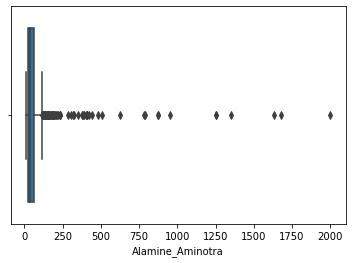

In [ ]:
sns.boxplot(x=data.Alamine_Aminotra)

In [ ]:
data.Alamine_Aminotra.value_counts()

25      24
20      23
22      18
21      17
18      17
        ..
71       1
75       1
76       1
78       1
2000     1
Name: Alamine_Aminotra, Length: 152, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alamine_Aminotra', ylabel='Density'>

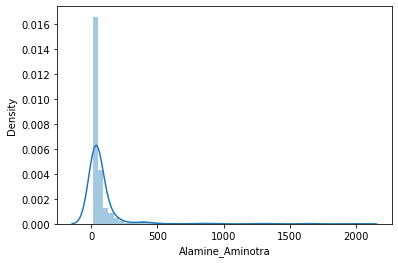

In [ ]:
# checking ouliers
sns.distplot(data.Alamine_Aminotra)

In [ ]:
IQR = stats.iqr(data.Alamine_Aminotra, interpolation = 'midpoint') 

IQR

## min and max limit calculation
# First quartile (Q1) 
Q1 = data.Alamine_Aminotra.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.Alamine_Aminotra.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [ ]:
min_limit

-33.0

In [ ]:
max_limit

117.25

In [ ]:
## filetring the data
data.loc[data['Alamine_Aminotra'] < min_limit]
data.loc[data['Alamine_Aminotra'] > max_limit]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkline_Phospate  \
15    38       0              1.8               0.8             342.0   
17    40       1              0.9               0.3             293.0   
18    40       1              0.9               0.3             293.0   
24    34       0              4.1               2.0             289.0   
25    34       0              4.1               2.0             289.0   
..   ...     ...              ...               ...               ...   
559   66       0             15.2               7.7             356.0   
560   66       0             16.6               7.6             315.0   
561   66       0             17.3               8.5             388.0   
568   16       0              7.7               4.1             268.0   
569   16       0              2.6               1.2             236.0   

     Alamine_Aminotra  Aspartate_Aminotra  Total_Protiens  Albumin  A/G_ratio  \
15                168                 441             7.6      4.4        1.3   
17                232                 245             6.8      3.1        0.8   
18                232                 245             6.8      3.1        0.8   
24                875                 731             5.0      2.7        1.1   
25                875                 731             5.0      2.7        1.1   
..                ...                 ...             ...      ...        ...   
559               321                 562             6.5      2.2        0.4   
560               233                 384             6.9      2.0        0.4   
561               173                 367             7.8      2.6        0.5   
568               213                 168             7.1      4.0        1.2   
569               131                  90             5.4      2.6        0.9   

     target  
15        1  
17        1  
18        1  
24        1  
25        1  
..      ...  
559       1  
560       1  
561       1  
568       1  
569       1  

[73 rows x 11 columns]

In [ ]:
## imputing the outliers as the count is high
data.loc[data['Alamine_Aminotra'] > max_limit,'Alamine_Aminotra']=np.median(data.Alamine_Aminotra)

In [ ]:
data.Alamine_Aminotra.value_counts()

35.0     82
25.0     24
20.0     23
22.0     18
28.0     17
         ..
90.0      1
112.0     1
71.0      1
114.0     1
75.0      1
Name: Alamine_Aminotra, Length: 89, dtype: int64

<AxesSubplot:xlabel='Aspartate_Aminotra'>

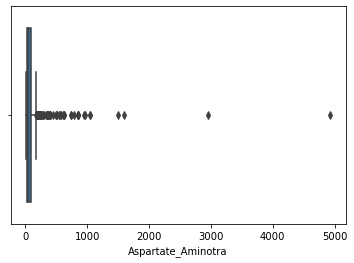

In [ ]:
sns.boxplot(x=data.Aspartate_Aminotra)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Aspartate_Aminotra', ylabel='Density'>

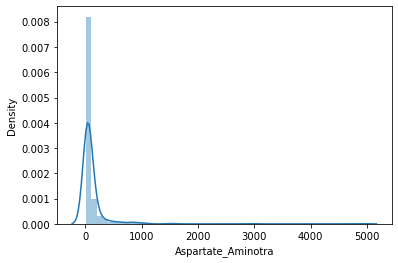

In [ ]:
# checking ouliers
sns.distplot(data.Aspartate_Aminotra)

In [ ]:
IQR = stats.iqr(data.Aspartate_Aminotra, interpolation = 'midpoint') 

IQR

## min and max limit calculation
# First quartile (Q1) 
Q1 = data.Aspartate_Aminotra.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.Aspartate_Aminotra.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [ ]:
min_limit

-68.0

In [ ]:
max_limit

180.0

In [ ]:
## filetring the data
data.loc[data['Aspartate_Aminotra'] < min_limit]
data.loc[data['Aspartate_Aminotra'] > max_limit]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkline_Phospate  \
15    38       0              1.8               0.8             342.0   
17    40       1              0.9               0.3             293.0   
18    40       1              0.9               0.3             293.0   
24    34       0              4.1               2.0             289.0   
25    34       0              4.1               2.0             289.0   
..   ...     ...              ...               ...               ...   
547   42       0             11.1               6.1             214.0   
557   51       0              4.0               2.5             275.0   
559   66       0             15.2               7.7             356.0   
560   66       0             16.6               7.6             315.0   
561   66       0             17.3               8.5             388.0   

     Alamine_Aminotra  Aspartate_Aminotra  Total_Protiens  Albumin  A/G_ratio  \
15               35.0                 441             7.6      4.4        1.3   
17               35.0                 245             6.8      3.1        0.8   
18               35.0                 245             6.8      3.1        0.8   
24               35.0                 731             5.0      2.7        1.1   
25               35.0                 731             5.0      2.7        1.1   
..                ...                 ...             ...      ...        ...   
547              60.0                 186             6.9      2.8        2.8   
557              35.0                 330             7.5      4.0        1.1   
559              35.0                 562             6.5      2.2        0.4   
560              35.0                 384             6.9      2.0        0.4   
561              35.0                 367             7.8      2.6        0.5   

     target  
15        1  
17        1  
18        1  
24        1  
25        1  
..      ...  
547       1  
557       1  
559       1  
560       1  
561       1  

[66 rows x 11 columns]

In [ ]:
## imputing the outliers as the count is high
data.loc[data['Aspartate_Aminotra'] > max_limit,'Aspartate_Aminotra']=np.median(data.Aspartate_Aminotra)

In [ ]:
data.Aspartate_Aminotra.value_counts()

42.0     75
23.0     16
21.0     14
30.0     14
20.0     14
         ..
98.0      1
116.0     1
10.0      1
142.0     1
100.0     1
Name: Aspartate_Aminotra, Length: 122, dtype: int64

<AxesSubplot:xlabel='Total_Protiens'>

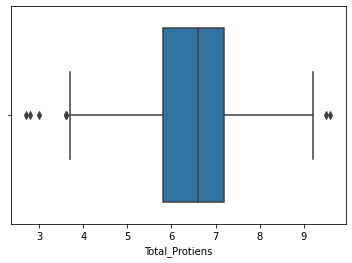

In [ ]:
sns.boxplot(x=data.Total_Protiens)

In [ ]:
data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkline_Phospate  \
0   62       0             10.9               5.5             208.5   
1   62       0              7.3               4.1             208.5   
2   58       0              1.0               0.4             182.0   
3   72       0              3.9               2.0             195.0   
4   46       0              1.8               0.7             208.0   

   Alamine_Aminotra  Aspartate_Aminotra  Total_Protiens  Albumin  A/G_ratio  \
0              64.0               100.0             7.5      3.2       0.74   
1              60.0                68.0             7.0      3.3       0.89   
2              14.0                20.0             6.8      3.4       1.00   
3              27.0                59.0             7.3      2.4       0.40   
4              19.0                14.0             7.6      4.4       1.30   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
# Defining X and y
X = data.iloc[:,:-1]
y = data.loc[:,'target']

In [ ]:
X.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkline_Phospate  \
0   62       0             10.9               5.5             208.5   
1   62       0              7.3               4.1             208.5   
2   58       0              1.0               0.4             182.0   
3   72       0              3.9               2.0             195.0   
4   46       0              1.8               0.7             208.0   

   Alamine_Aminotra  Aspartate_Aminotra  Total_Protiens  Albumin  A/G_ratio  
0              64.0               100.0             7.5      3.2       0.74  
1              60.0                68.0             7.0      3.3       0.89  
2              14.0                20.0             6.8      3.4       1.00  
3              27.0                59.0             7.3      2.4       0.40  
4              19.0                14.0             7.6      4.4       1.30

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
577    2
578    1
579    1
580    1
581    2
Name: target, Length: 578, dtype: int64

In [ ]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score

In [ ]:
accuracy_score(y_test,y_hat)

0.6620689655172414

In [ ]:
confusion_matrix(y_test,y_hat)

array([[88,  6],
       [43,  8]], dtype=int64)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier() ## model object creation
model2.fit(X_train,y_train)
y_hatt=model2.predict(X_test)

In [ ]:
accuracy_score(y_test,y_hatt)

0.6620689655172414

In [ ]:
confusion_matrix(y_test,y_hatt)

array([[79, 15],
       [34, 17]], dtype=int64)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [ ]:
## Checking the balance of data
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({1: 319, 2: 114})
SMOTE Classes Counter({1: 319, 2: 319})


In [ ]:
model2.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(precision_score(y_test,y_predict,average='weighted'))
pd.crosstab(y_test,y_predict)

0.6364682435227316


col_0    1  2
target       
1       88  6
2       43  8

In [ ]:
accuracy_score(y_test,y_predict)

0.6620689655172414

In [ ]:
def hi(x):
  print(x)

In [ ]:
hi('shiv')

shiv


### From scratch


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/indian_liver_patient.csv')

In [4]:
data

Age  Gender  Total_Bilirubin  ...  Albumin  Albumin_and_Globulin_Ratio  Dataset
0     65  Female              0.7  ...      3.3                        0.90        1
1     62    Male             10.9  ...      3.2                        0.74        1
2     62    Male              7.3  ...      3.3                        0.89        1
3     58    Male              1.0  ...      3.4                        1.00        1
4     72    Male              3.9  ...      2.4                        0.40        1
..   ...     ...              ...  ...      ...                         ...      ...
578   60    Male              0.5  ...      1.6                        0.37        2
579   40    Male              0.6  ...      3.2                        1.10        1
580   52    Male              0.8  ...      3.2                        1.00        1
581   31    Male              1.3  ...      3.4                        1.00        1
582   38    Male              1.0  ...      4.4                        1.50        2

[583 rows x 11 columns]

In [5]:
data.value_counts('Dataset')

Dataset
1    416
2    167
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [7]:
data['Gender']=lab.fit_transform(data['Gender'])

In [22]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [23]:
x = data.drop('Dataset',axis=1)
y = data['Dataset']

In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 5,test_size = 0.3)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
log = LogisticRegression()
tree = DecisionTreeClassifier(criterion='gini')
ensem = RandomForestClassifier()

In [58]:
log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = log.predict(x_test)

In [60]:
data = data.fillna(method='ffill')

In [61]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

In [62]:
acc

0.7142857142857143

In [63]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
y_pred_tree = tree.predict(x_test)

In [65]:
accu_tree = accuracy_score(y_test,y_pred_tree)
accu_tree

0.6342857142857142

In [66]:
ensem.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
y_pred_ensem = ensem.predict(x_test)

In [68]:


accu_ensem = accuracy_score(y_test,y_pred_ensem)
accu_ensem

0.6571428571428571

#Removing imbalance dataset from the data


In [69]:
from collections import Counter

In [70]:
Counter(y_train)

Counter({1: 291, 2: 117})

In [106]:
from imblearn.under_sampling import NearMiss
ns = NearMiss(0.8)
ns_x_train,ns_y_train = ns.fit_sample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [107]:
Counter(ns_y_train)

Counter({1: 141, 2: 113})

In [108]:
log_ns = RandomForestClassifier()

In [109]:
log_ns.fit(ns_x_train,ns_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
y_pred_ns =log_ns.predict(x_test)

In [111]:
acc_ns = accuracy_score(y_test,y_pred_ns)
acc_ns

0.5085714285714286

In [143]:
from imblearn.over_sampling import RandomOverSampler
ran = RandomOverSampler(0.80)

In [144]:
#fit_sample
x_train_ran, y_train_ran = ran.fit_sample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [145]:
ran = RandomForestClassifier()

In [146]:
ran.fit(x_train_ran,y_train_ran)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
y_pred_ran = ran.predict(x_test)

In [148]:
acc_ran = accuracy_score(y_test,y_pred_ran)
acc_ran

0.7028571428571428

In [118]:
Counter(y_train_ran)

Counter({1: 295, 2: 236})

In [167]:
logi = RandomForestClassifier()

In [168]:
logi.fit(x_train_ran,y_train_ran)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [169]:
logi_pred = logi.predict(x_test)

In [170]:
acc_logi = accuracy_score(y_test,logi_pred)
acc_logi

0.6971428571428572

In [157]:
from imblearn.combine import SMOTETomek
smo = SMOTETomek(0.75)
x_train_smo ,y_train_smo = smo.fit_sample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [158]:
forest2 = RandomForestClassifier()


In [159]:
forest2.fit(x_train_smo,y_train_smo)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [160]:
y_pred_smo = forest2.predict(x_test)

In [161]:
y_pred_acc_smo = accuracy_score(y_test,y_pred_smo)
print(y_pred_acc_smo)

0.6971428571428572


In [162]:
from imblearn.ensemble import EasyEnsembleClassifier
es = EasyEnsembleClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24

In [163]:
es.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

EasyEnsembleClassifier(base_estimator=None, n_estimators=10, n_jobs=1,
                       random_state=None, replacement=False,
                       sampling_strategy='auto', verbose=0, warm_start=False)

In [164]:
y_pred_es = es.predict(x_test)

In [165]:
y_acc_es = accuracy_score(y_test,y_pred_es)

In [166]:
print(y_acc_es)

0.5885714285714285
